# [](https://learning.quantum.ibm.com/course/basics-of-quantum-information/)IBM Quantum Learning, Basics of Quantum Information 
# (3) Circuits
* As a part of my learning, I'm trying to understand the basic framework of quantum information.
* This sub-course Circuits introduces the quantum circuit model of computation, which provides a standard way to describe quantum computations.
* It also introduces a few important mathematical concepts, including inner products between vectors, the notions of orthogonality and orthonormality, and projections and projective measurements, which generalize standard basis measurements.
* Through these concepts, we'll derive fundamental limitations on quantum information, including the no-cloning theorem and the impossibility to perfectly discriminate non-orthogonal quantum states.
# Major Topics Covered
* Circuits
  * Boolean Circuits
  * Other type of circuits
  * Quantum Circuits
* Inner products, orthonormality, and projections
  * Inner products
  * Orthogonal and orthonormal sets
  * Projections and projective measurements
* Limitations on quantum information
  * Irrelevance of global phases
  * No-cloning theorem
  * Non-orthogonal states cannot be perfectly discriminated

# Circuits
* In computer science, circuits are models of computation in which information is carried by wires through a network of gates, which represent operations on the information carried by the wires. Quantum circuits are a specific model of computation based on this more general concept.
* Although the word "circuit" often refers to a circular path, circular paths aren't actually allowed in the circuit models of computation that are most commonly studied. That is to say, we usually consider acyclic circuits when we're thinking about circuits as computational models. Quantum circuits follow this pattern; a quantum circuit represents a finite sequence of operations that cannot contain feedback loops.

# Boolean Circuits
* a (classical) Boolean circuit, where the wires carry binary values and the gates represent Boolean logic operations
* The flow of information along the wires goes from left to right: the wires on the left-hand side of the figure labeled 
X and Y are input bits, which can each be set to whatever binary value we choose, and the wire on the right-hand side is the output. The intermediate wires take whatever values are determined by the gates, which are evaluated from left to right.
![](https://learning-api.quantum.ibm.com/assets/349f8e65-0b10-4926-8fbe-119c525dd3c3?format=auto&quality=80)

The gates are AND gates (labeled ∧), OR gates (labeled ∨), and NOT gates (labeled ¬). The functions computed by these gates will likely be familiar to many readers, but here they are represented by tables of values:

# Other types of circuits
* As was suggested above, the notion of a circuit in computer science is very general. For example, circuits whose wires carry values other than 0 and 1 are sometimes analyzed, as are gates representing different choices of operations.
* In arithmetic circuits, for instance, the wires may carry integer values while the gates represent arithmetic operations, such as addition and multiplication. The following figure depicts an arithmetic circuit that takes two variable input values (x and y) as well as a third input set to the value 1. The values carried by the wires, as functions of the values x and y, are shown in the figure.
* ![](https://learning-api.quantum.ibm.com/assets/975ff969-e958-4054-b768-42a06ac43ead?format=auto&quality=80)

# Quantum Circuits
* In the quantum circuit model, wires represent qubits and gates represent operations on these qubits. We'll focus for now on operations we've encountered so far, namely unitary operations and standard basis measurements. As we learn about other sorts of quantum operations and measurements, we can enhance our model accordingly.
* Here's a simple example of a quantum circuit:
![](https://learning-api.quantum.ibm.com/assets/5133ac2b-51a5-49e6-80c3-c068ad1ea6cf?format=auto&quality=80)
* In this circuit, we have a single qubit named X,which is represented by the horizontal line, and a sequence of gates representing unitary operations on this qubit. Just like in the examples above, the flow of information goes from left to right — so the first operation performed is a Hadamard operation, the second is an S operation, the third is another Hadamard operation, and the final operation is a T operation. Applying the entire circuit therefore applies the composition of these operations, T H S H, to the qubit X.
* Sometimes we may wish to explicitly indicate the input or output states of circuits.
![](https://learning-api.quantum.ibm.com/assets/b3da9e73-495b-4a64-855b-e70fff126d16?format=auto&quality=80)

* Quantum circuits start out with all qubits initialized to ∣0⟩,as we have in this case, but there are also situations where the input qubits are initially set to different states.
* Now let's see how we can specify this circuit in Qiskit. We'll start with a version check along with the imports needed for the remainder of the lesson.

# Installing Required Qiskit Package through pip install

In [3]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 53.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 25.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=affea1f5d457bdc3226923a1e62d4124a289b005

# Checking Qiskit Version

In [4]:
from qiskit import __version__
print(__version__)

2.0.1


# Importing the QuantumCircuit, QuantumRegister, ClassicalRegister

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

* We've seen some of these imports in the two previous lessons, but others are new. For now, let's just highlight that we will be using the Aer simulator to simulate quantum circuits.
* To begin, we can build the circuit above as follows, by defining a quantum circuit with one qubit and sequentially adding gates from left to right.

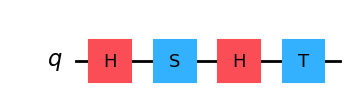

In [6]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

* The default names for qubits in Qiskit are q_0, q_1, q_2, etc., and when there's just a single qubit, like our example, the default name is q rather than q_0. If we wish to choose our own name we can do this using the 'QuantumRegister' class, which allows us to name a collection of qubits as treat it as a single object. Here we're doing this with just a single qubit.

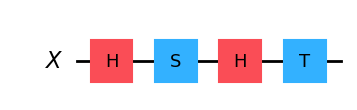

In [7]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

Here's another example of a quantum circuit, this time with two qubits:
![](https://learning-api.quantum.ibm.com/assets/ae1f7901-a023-4fd9-9d6a-b0bf1d825480?format=auto&quality=80)

* As always, the gate labeled H refers to a Hadamard operation, while the second gate is a controlled-NOT operation: the solid circle represents the control qubit and the circle resembling the symbol ⊕ denotes the target qubit.
* Before examining this circuit in greater detail and explaining what it does, it is imperative that we first clarify how qubits are ordered in quantum circuits. This connects with the convention that Qiskit uses for naming and ordering systems that was mentioned briefly in the previous lesson.

Qiskit's qubit ordering convention for circuits

* In Qiskit, the topmost qubit in a circuit diagram has index 0 and corresponds to the rightmost position in a tuple of qubits (or in a string, Cartesian product, or tensor product corresponding to this tuple). The second-from-top qubit has index 1, and corresponds to the position second-from-right in a tuple, and so on, down to the bottommost qubit, which has the highest index, and corresponds to the leftmost position in a tuple.
* In particular, Qiskit's default names for the qubits in an n-qubit circuit are represented by the n-tuple (q_n−1,…,q_0), with q_0 being the qubit on the top and q_n−1 on the bottom in quantum circuit diagrams.

To understand what the circuit does, we can go from left to right through its operations.

1. The first operation is a Hadamard operation on Y:
![](https://learning-api.quantum.ibm.com/assets/5bb671e3-62b8-41e4-9884-742a5a8bcd35?format=auto&quality=80)

* When applying a gate to a single qubit like this, nothing happens to the other qubits (which is just one other qubit in this case). Nothing happening is equivalent to the identity operation being performed. 

2. The second operation is the controlled-NOT operation, where Y is the control and X is the target:
![](https://learning-api.quantum.ibm.com/assets/8d57df60-1aaf-4ea6-946e-8995e4dd3d54?format=auto&quality=80)

* The controlled-NOT gate's action on standard basis states is as follows:
![](https://learning-api.quantum.ibm.com/assets/c4442919-d726-4cb5-a9aa-d28c8362fd53?format=auto&quality=80)

* Given that we order the qubits as (X,Y), with X being on the bottom and Y being on the top of our circuit, the matrix representation of the controlled-NOT gate is this:

* This circuit therefore gives us a way to create the state |ϕ^+⟩ if we run it on two qubits initialized to ∣00⟩. More generally, it provides us with a way to convert the standard basis to the Bell basis. (Note that, while it is not important for this example, the −1 phase factor on the last state, −∣ψ^−⟩, could be eliminated if we wanted by making a small addition to the circuit. For instance, we could add a controlled-Z gate at the beginning, which is similar to a controlled-NOT gate except that a Z operation is applied to the target qubit rather than a NOT operation when the control is set to 1. Alternatively, we could add a swap gate at the end. Either choice eliminates the minus sign without affecting the circuit's action on the other three standard basis states.)

* Let's create the circuit in Qiskit and check that our calculations are correct.

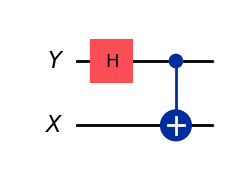

<IPython.core.display.Latex object>

In [8]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

* In general, quantum circuits can contain any number of qubit wires. We may also include classical bit wires, which are indicated by double lines, like in this example:
![](https://learning-api.quantum.ibm.com/assets/b968b9cf-2fd8-4baa-9145-873902df47b6?format=auto&quality=80)

* Here we have a Hadamard gate and a controlled-NOT gate on two qubits 
X and Y, just like in the previous example. We also have two classical bits, A and B, as well as two measurement gates. The measurement gates represent standard basis measurements: the qubits are changed into their post-measurement states, while the measurement outcomes are overwritten onto the classical bits to which the arrows point.

* Here's an implementation of this circuit using Qiskit:

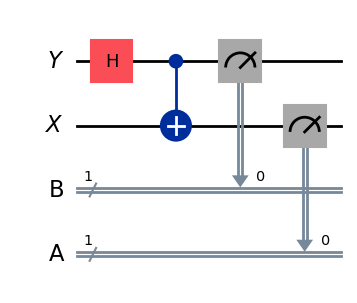

In [9]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output="mpl"))

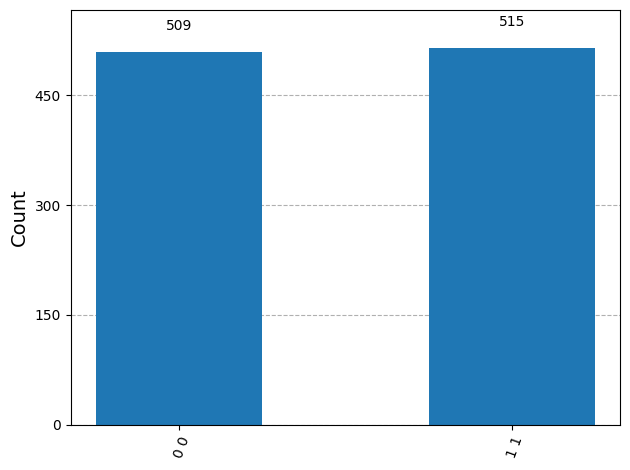

In [10]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

* It's often convenient to depict a measurement as a gate that takes a qubit as input and outputs a classical bit (as opposed to outputting the qubit in its post-measurement state and writing the result to a separate classical bit). This means the measured qubit has been discarded and can safely be ignored thereafter, its state having changed into ∣0⟩ or ∣1⟩ depending upon the measurement outcome.

* For example, the following circuit diagram represents the same process as the one in the previous diagram, but where we disregard X and Y after measuring them:

![](https://learning-api.quantum.ibm.com/assets/10da2762-1b91-4400-aead-cefbc6bf103d?format=auto&quality=80)

* As the course continues, we'll see more examples of quantum circuits, which are usually more complicated than the simple examples above. Here are some examples of symbols used to denote gates that commonly appear in circuit diagrams:

* Single-qubit gates are generally shown as squares with a letter indicating which operation it is, like this:

![](https://learning-api.quantum.ibm.com/assets/5287db37-dae5-4492-a7be-a8105166c093?format=auto&quality=80)

* Not gates (or, equivlently, X gates) are also sometimes denoted by a circle around a plus sign:
![](https://learning-api.quantum.ibm.com/assets/a86ecdd7-b504-4b7c-a8dd-eafb91d483c9?format=auto&quality=80)

* Swap gates are denoted as follows:
![](https://learning-api.quantum.ibm.com/assets/eebd2eae-bcac-4939-8fac-442ce69bf363?format=auto&quality=80)

* Controlled-gates, meaning gates that describe controlled-unitary operations, are denoted by a filled-in circle (indicating the control) connected by a vertical line to whatever operation is being controlled. For instance, controlled-NOT gates, controlled-controlled-NOT (or Toffoli) gates, and controlled-swap (Fredkin) gates are denoted like this:
![](https://learning-api.quantum.ibm.com/assets/e31d60fc-9f55-4ff9-a917-23ce22ef26e6?format=auto&quality=80)

* Arbitrary unitary operations on multiple qubits may be viewed as gates. They are depicted by rectangles labeled by the name of the unitary operation. For instance, here is a depiction of an (unspecified) unitary operation U as a gate, along with a controlled version of this gate:
![](https://learning-api.quantum.ibm.com/assets/edd602fe-8899-4b0c-84f7-c0db1c7cb675?format=auto&quality=80)

# Inner products, orthonormality, and projections

**Inner products**
* Recall from the Single systems lesson that, when we use the Dirac notation to refer to an arbitrary column vector as a ket.
* the corresponding bra vector is the conjugate transpose of this vector:
* Alternatively, if we have some classical state set Σ in mind, and we express a column vector as a ket
* then the corresponding row (or bra) vector is the conjugate transpose
* We also observed that the product of a bra vector and a ket vector, viewed as matrices either having a single row or a single column, results in a scalar. Specifically, if we have two (column) vectors.
* Written other stuff in notes manually

1. Relationship to the Euclidean norm. The inner product of any vector
2. Conjugate symmetry. For any two vectors
3. Linearity in the second argument (and conjugate linearity in the first).
4. The Cauchy–Schwarz inequality. For every choice of vectors 
∣ϕ⟩ and ∣ψ⟩ having the same number of entries, we have an inequality
This is an incredibly handy inequality that gets used quite extensively in quantum information (and in many other fields of study).

**Orthogonal and orthonormal sets**
* Two vectors ∣ϕ⟩ and ∣ψ⟩ are said to be orthogonal if their inner product is zero:
⟨ψ∣ϕ⟩=0.
* Geometrically, we can think about orthogonal vectors as vectors at right angles to each other.
* A set of vectors is called an orthogonal set if every vector in the set is orthogonal to every other vector in the set. That is, this set is orthogonal if ⟨ψ 
j
​
 ∣ψ 
k
​
 ⟩=0 for all choices of j,k∈{1,…,m} for which j≠k.
* A set of vectors 
{
∣
ψ
1
⟩
,
…
,
∣
ψ
m
⟩
}
{∣ψ 
1
​
 ⟩,…,∣ψ 
m
​
 ⟩} is called an orthonormal set if it is an orthogonal set and, in addition, every vector in the set is a unit vector. Alternatively, this set is an orthonormal set if we have